# Brexit

- Part 1 - Date Preprocessing
- Part 2 - Simple Analysis: Wordcloud & Lexical Dispersion
- Part 3 - Vader Sentiment Analysis
     - Sentiment over Time
     - Named Entity Detection & Affect Calculator
- Part 4 - Topic Modelling with LDA     
     - LDA: Find Topics
     - Text Summarization: Understand each topic

## Part 1 - Data Preprocessing

#### Import data

In [1]:
# Necessary imports

import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Open tweets as dataframe

path = 'C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data/'
path2 = 'C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data2/'

# df_a11 = pd.read_csv(f"{path2}data_a11.csv",index_col=0)
# df_a12 = pd.read_csv(f"{path2}data_a12.csv",index_col=0)
# df_a1 = df_a11.append(df_a12)
# df_a21 = pd.read_csv(f"{path2}data_a21.csv",index_col=0)
# df_a22 = pd.read_csv(f"{path2}data_a22.csv",index_col=0)
# df_a2 = df_a21.append(df_a22)
# df_a31 = pd.read_csv(f"{path2}data_a31.csv",index_col=0)
# df_a32 = pd.read_csv(f"{path2}data_a32.csv",index_col=0)
# df_a3 = df_a31.append(df_a32)
# df_b = pd.read_csv(f"{path2}data_b.csv",index_col=0)
# df_c = pd.read_csv(f"{path2}data_c.csv",index_col=0)
# df_d = pd.read_csv(f"{path2}data_d.csv",index_col=0)
# df_e = pd.read_csv(f"{path2}data_e.csv",index_col=0)
# df_f = pd.read_csvf(f"{path2}data_f.csv",index_col=0)
# df_g = pd.read_csv(f"{path2}data_g.csv",index_col=0)
# all_df = [df_a1, df_a2, df_a3, df_b, df_c, df_d, df_e, df_f, df_g]

df_famous = pd.read_csv(f"{path}famous_dataset.csv",index_col=0)

#### Camp Analyzer

In [3]:
# Formulate leave_remain_dict

leave_hashtags = ['leaveeuofficial','labourleave','ukip', 'no2eu', 'notoeu','betteroffout', 'voteout', 'eureform', 'britainout', 'leaveeu', 'voteleave','beleave', 'loveeuropeleaveeu', 'leaveeu', 'vote_leave', 'leave']
remain_hashtags = ['intogether','labourinforbritain','catsagainstbrexit','yes2eu','yestoeu', 'betteroffin', 'votein', 'ukineu', 'bremain', 'strongerin','leadnotleave', 'voteremain', 'vote_remain', 'remain']

def create_dict(hashtag,classification,dictionary=dict()):
    for i in range(len(hashtag)):
        dictionary[hashtag[i]]=[classification]
    return dictionary

leave_remain_dict = create_dict(leave_hashtags,'leave')
leave_remain_dict = create_dict(remain_hashtags, 'remain', dictionary=leave_remain_dict)

In [4]:
def camp_analyzer(text, camp_dict=leave_remain_dict): 
    camps = {x for y in camp_dict.values() for x in y} 
    camp_count = dict()
    for camp in camps: 
        camp_count[camp] = 0 
        
    for word in text.split(): 
        if camp_dict.get(word): 
            for camp in camp_dict.get(word): 
                camp_count[camp] += 1 
        elif camp_dict.get(word[1:]): 
            for camp in camp_dict.get(word[1:]):
                camp_count[camp] += 1
    import operator 
    if list(camp_count.values()) == [0,0]: 
        result='neutral'
    else: 
        result = max(camp_count.items(), key=operator.itemgetter(1))[0]
    
    return camp_count, result

In [ ]:
# Camp analyze all tweets in all_df

for df in all_df:
    df['leave'] = df['Text'].apply(lambda x: camp_analyzer(str(x).lower())[0].get('leave'))
    df['remain'] = df['Text'].apply(lambda x: camp_analyzer(str(x).lower())[0].get('remain'))
    df['camp'] = df['Text'].apply(lambda x: camp_analyzer(str(x).lower())[1])

In [5]:
# Save all_df with camp analyzed columns for easy future retrieval:

# df_a1.to_csv('C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data2/camp/data_a1_camp.csv')
# df_a2.to_csv('C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data2/camp/data_a2_camp.csv')
# df_a3.to_csv('C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data2/camp/data_a3_camp.csv')
# df_b.to_csv('C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data2/camp/data_b_camp.csv')
# df_c.to_csv('C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data2/camp/data_c_camp.csv')
# df_d.to_csv('C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data2/camp/data_d_camp.csv')
# df_e.to_csv('C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data2/camp/data_e_camp.csv')
# df_f.to_csv('C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data2/camp/data_f_camp.csv')
# df_g.to_csv('C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data2/camp/data_g_camp.csv')

path2 = 'C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/data2/'
df_a1 = pd.read_csv(f"{path2}/camp/data_a1_camp.csv",index_col=0)
df_a2 = pd.read_csv(f"{path2}/camp/data_a2_camp.csv",index_col=0)
df_a3 = pd.read_csv(f"{path2}/camp/data_a3_camp.csv",index_col=0)
df_b = pd.read_csv(f"{path2}/camp/data_b_camp.csv",index_col=0)
df_c = pd.read_csv(f"{path2}/camp/data_c_camp.csv",index_col=0)
df_d = pd.read_csv(f"{path2}/camp/data_d_camp.csv",index_col=0)
df_e = pd.read_csv(f"{path2}/camp/data_e_camp.csv",index_col=0)
df_f = pd.read_csv(f"{path2}/camp/data_f_camp.csv",index_col=0)
df_g = pd.read_csv(f"{path2}/camp/data_g_camp.csv",index_col=0)
all_df = [df_a1, df_a2, df_a3, df_b, df_c, df_d, df_e, df_f, df_g]

In [6]:
# Summary Statistics

pd.DataFrame(([len(df[df['camp']=='leave']),len(df[df['camp']=='remain']),len(df[df['camp']=='neutral']),(len(df[df['camp']=='leave'])+len(df[df['camp']=='remain']))] for df in all_df), columns=["Leave","Remain","Neutral","L+R"])

,Leave,Remain,Neutral,L+R
0,63724,24540,55113,88264
1,71734,37491,61772,109225
2,40753,4562,45934,45315
3,6793,424,9695,7217
4,11318,1070,10979,12388
5,10333,1026,10351,11359
6,12833,1728,12513,14561
7,11109,1898,11301,13007
8,8244,1435,12307,9679


## Part 2 - Simple Analysis: Word cloud & Lexical Dispersion

### Word Clouds
#### (1) All Tweets: 2016 to 2019
Generating our presentation's cover picture: a word cloud of all the tweets from periods a to g

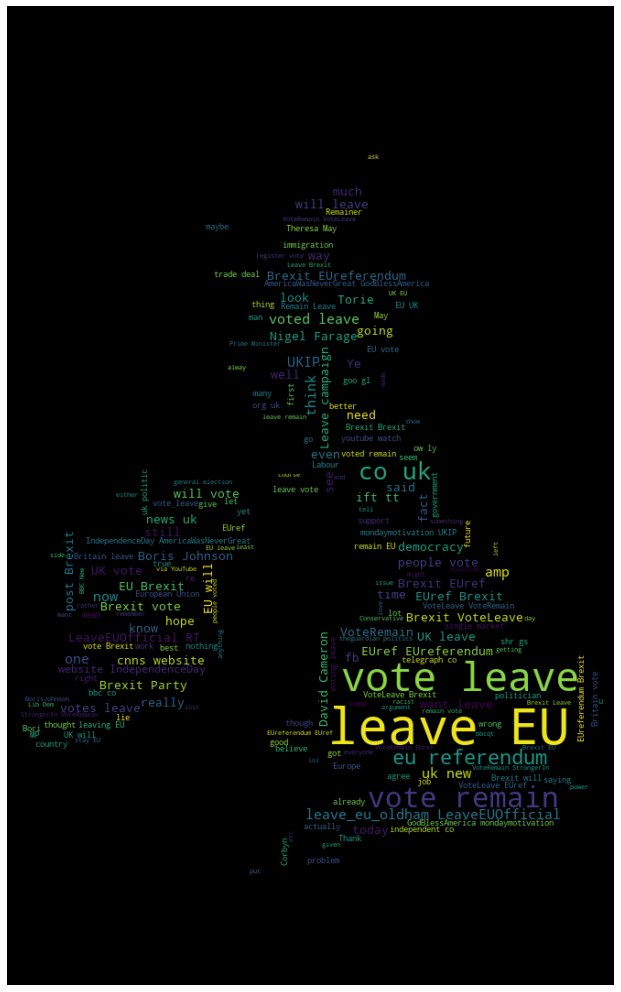

In [11]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests

path3 = 'C:/Users/tho_j/Documents/Columbia U/IEOR E4523 Data Analytics/Brexit/wordcloud/'
text = ''
for df in all_df:
    tweets = ' '.join(txt for txt in df['Text'] if type(txt) == str)
    tweets.replace('vote leave', 'voteleave')
    tweets.replace('vote_leave', 'voteleave')
    tweets.replace('vote remain', 'voteremain')
    tweets.replace('vote_remain', 'voteremain')
    text += tweets
       
stopwords = set(STOPWORDS)
mask = np.array(Image.open(requests.get('https://upload.wikimedia.org/wikipedia/commons/3/38/BIThumbMap_Blank.png', stream=True).raw))

stopwords.update(["bit", "pic", "twitter", "il", "html", "https", "de", "la", "en", "van", "le", "maintien", "maar", "gamble", "et", "en"])
wordcloud = WordCloud(height=1080, stopwords=stopwords, width=2020, background_color="black", mask=mask).generate(text)

plt.figure(figsize=(32, 18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file(f"{path3}all_wordcloud.png")

#### (2) All Tweets: Leave vs Remain

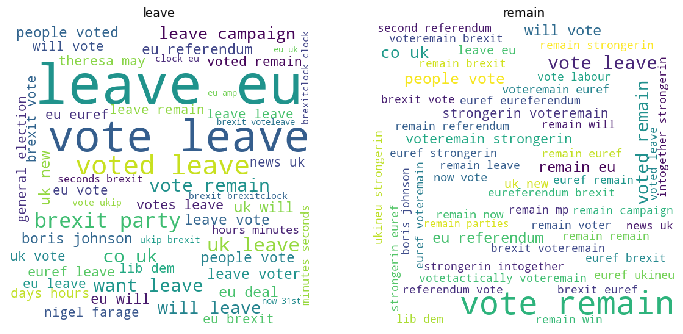

In [12]:
text = [['','']]*7
for df in [df_a1, df_a2, df_a3]:
    tweetsL = ' '.join(txt for txt in df[df['camp']=='leave']['Text'] if type(txt) == str)
    tweetsR = ' '.join(txt for txt in df[df['camp']=='remain']['Text'] if type(txt) == str)
    text[0][0] += tweetsL.lower()
    text[0][1] += tweetsR.lower()
    
for i in range(1,7):
    for j in range(3,9):
        tweetsL = ' '.join(txt for txt in all_df[j][all_df[j]['camp']=='leave']['Text'] if type(txt) == str)
        tweetsR = ' '.join(txt for txt in all_df[j][all_df[j]['camp']=='remain']['Text'] if type(txt) == str)
        text[i][0] += tweetsL.lower()
        text[i][1] += tweetsR.lower() 

text_leave = ' '.join(text[i][0] for i in range(7))
text_remain = ' '.join(text[i][1] for i in range(7))
text_LR = [text_leave,text_remain]

COL_NUM = 2
ROW_NUM = 1
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
titles = ['leave','remain']

for i in range(len(text_LR)): 
    ax = axes[i%COL_NUM]
    ax.set_title(titles[i])
    wordcloud = WordCloud(stopwords=stopwords,background_color='white',width=500,height=500,max_words=50).generate(text_LR[i])
    wordcloud.to_file(f"{path3}all_{titles[i]}_wordcloud.png")
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

### Lexical Dispersion
#### Further Cleaning - stemming and decontracting

Note: Using a truncated version of corpus a to g because attempting to run this for all tweets took too long

In [64]:
text_s = [['','']]*7
for df in [df_a1, df_a2, df_a3]:
    tweetsL = ' '.join(txt for txt in df[df['camp']=='leave']['Text'][:1000] if type(txt) == str)
    tweetsR = ' '.join(txt for txt in df[df['camp']=='remain']['Text'][:1000] if type(txt) == str)
    text_s[0][0] += tweetsL.lower()
    text_s[0][1] += tweetsR.lower()
    
for i in range(1,7):
    for j in range(3,9):
        tweetsL = ' '.join(txt for txt in all_df[j][all_df[j]['camp']=='leave']['Text'][:1000] if type(txt) == str)
        tweetsR = ' '.join(txt for txt in all_df[j][all_df[j]['camp']=='remain']['Text'][:1000] if type(txt) == str)
        text_s[i][0] += tweetsL.lower()
        text_s[i][1] += tweetsR.lower() 

text_leave_s = ' '.join(text_s[i][0] for i in range(7))
text_remain_s = ' '.join(text_s[i][1] for i in range(7))
text_LR_s = [text_leave_s,text_remain_s]

In [6]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

p_stemmer = PorterStemmer()
stopWords = set(stopwords.words('english'))

def remove_stop_stem_contract(tweets: list, stem=True) -> list:
    tweets_token = list()
    for tweet in tweets:
        tweet = decontracted(tweet)
        tweet_words = word_tokenize(tweet)
        tweet_words_filtered = list()
        for w in tweet_words:
            if w not in stopWords:
                tweet_words_filtered.append(w)
        if stem:
            tweets_token.append(' '.join([p_stemmer.stem(i) for i in tweet_words_filtered]))
        else:
            tweets_token.append(' '.join(tweet_words_filtered))
    return tweets_token

#### Dispersion over time for Leave and Remain
- Dispersion of most common words for Leave and Remain respectively over time.
- Most common words identified from earlier wordclouds

In [ ]:
text_leave_s_clean = remove_stop_stem_contract([text_leave_s])[0]
text_remain_s_clean = remove_stop_stem_contract([text_remain_s])[0]

Dispersion plot for Leave tweets


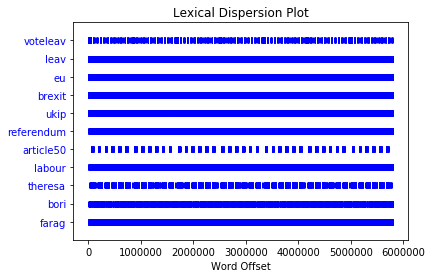

In [109]:
print("Dispersion plot for Leave tweets")
disp_words = ["voteleav", "leav", "eu", "brexit", "ukip", "referendum", "article50", "labour", "theresa", "bori", "farag"]
ntext_leave_s = nltk.Text(word_tokenize(text_leave_s_clean))
ntext_leave_s.dispersion_plot(disp_words)

Dispersion plot for Remain tweets


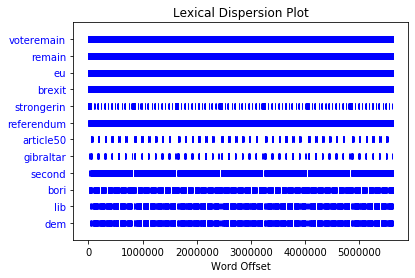

In [111]:
print("Dispersion plot for Remain tweets")
disp_words = ["voteremain", "remain", "eu", "brexit", "strongerin", "referendum", "article50","gibraltar", "second", "bori", "lib", "dem"]
ntext_remain_s = nltk.Text(word_tokenize(text_remain_s_clean))
ntext_remain_s.dispersion_plot(disp_words)

## Part 3 - Vader Sentiment Analysis

In [123]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### (A) Sentiments over Time

In [124]:
def sentiment_scores(tweet): 
    analyzer = SentimentIntensityAnalyzer() 
    sentiment_dict = analyzer.polarity_scores(tweet) 
    
    negative = sentiment_dict.get('neg')*100
    neutral = sentiment_dict.get('neu')*100
    positive = sentiment_dict.get('pos')*100
    compound = sentiment_dict.get('compound')*100
    
    return negative, neutral, positive, compound

def vader_sentiment(tweets, threshold=50):
    sent_neg = []
    sent_pos = []
    sent_neu = []
    sent_com = []
    for tweet in tweets:
        neg,neu,pos,com = sentiment_scores(tweet)
        sent_neg.append(neg)
        sent_pos.append(neu)
        sent_neu.append(pos)
        sent_com.append(com)
        
    list_ = []
    for i in range(len(tweets)):
        list_.append([tweets[i], sent_neg[i], sent_pos[i], sent_neu[i], sent_com[i]])
    col = ['Text','Negative Score','Positive Score', 'Neutral Score', 'Compound Score']
    df2 = pd.DataFrame(list_, columns = col)
    Sen = []
    conditions = [
    (df2['Compound Score'] >= threshold),
    (df2['Compound Score'] <= -threshold),
    ((df2['Compound Score'] < threshold) & df2['Compound Score'] > -threshold),
    ]
    choices = ['Positive', 'Negative', 'Neutral']
    df2['Sentiment'] = np.select(conditions, choices)
    return df2

def show_graph(df):
    fig, ax = plt.subplots(figsize=(16, 4), subplot_kw=dict(aspect="equal"))
    ax.axis("equal")

    data = [
        100 * round(sum(df['Compound Score'] < 0) / len(df['Compound Score']), 5),
        100 * round(sum(df['Compound Score'] == 0) / len(df['Compound Score']), 5),
        100 * round(sum(df['Compound Score'] > 0) / len(df['Compound Score']), 5)
    ]
    labels = ['Negative','Neutral','Positive']

    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.35), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.72)
    kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate("{:.2f}%".format(data[i]) + " " + labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.2*y),
                     horizontalalignment=horizontalalignment, **kw)

    ax.set_title("Event's date sentiments")
    plt.show()

In [147]:
tweets_a1 = []
for tweet in df_a1['Text'][:1000].to_list():
    if(type(tweet) == str):
        tweets_a1.append(tweet)
        
tweets_a2 = []
for tweet in df_a2['Text'][:1000].to_list():
    if(type(tweet) == str):
        tweets_a2.append(tweet)
        
tweets_a3 = []
for tweet in df_a3['Text'][:1000].to_list():
    if(type(tweet) == str):
        tweets_a3.append(tweet)
        
tweets_b = []
for tweet in df_b['Text'][:1000].to_list():
    if(type(tweet) == str):
        tweets_b.append(tweet)
        
tweets_c = []
for tweet in df_c['Text'][:1000].to_list():
    if(type(tweet) == str):
        tweets_c.append(tweet)
        
        
tweets_d = []
for tweet in df_d['Text'][:1000].to_list():
    if(type(tweet) == str):
        tweets_d.append(tweet)
        
tweets_e = []
for tweet in df_e['Text'][:1000].to_list():
    if(type(tweet) == str):
        tweets_e.append(tweet)
        
tweets_f = []
for tweet in df_f['Text'][:1000].to_list():
    if(type(tweet) == str):
        tweets_f.append(tweet)
        
tweets_g = []
for tweet in df_g['Text'][:1000].to_list():
    if(type(tweet) == str):
        tweets_g.append(tweet)

a1) May 2016


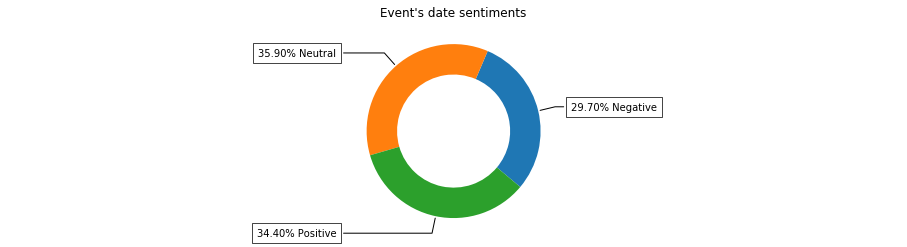

In [148]:
tweets_a1_vd = vader_sentiment(tweets_a1,35) # returns dataframe
print('a1) May 2016')
show_graph(tweets_a1_vd)

a2) June 2016


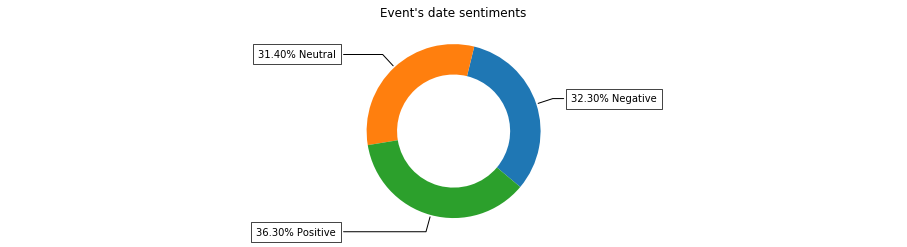

In [149]:
tweets_a2_vd = vader_sentiment(tweets_a2,35) 
print('a2) June 2016')
show_graph(tweets_a2_vd)

a3) July 2016


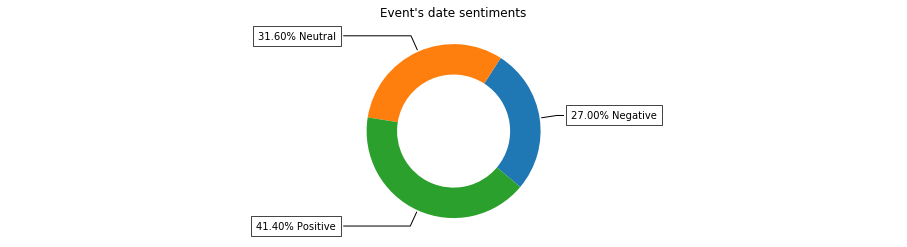

In [150]:
tweets_a3_vd = vader_sentiment(tweets_a3,35) 
print('a3) July 2016')
show_graph(tweets_a3_vd)

b) March 29 2017


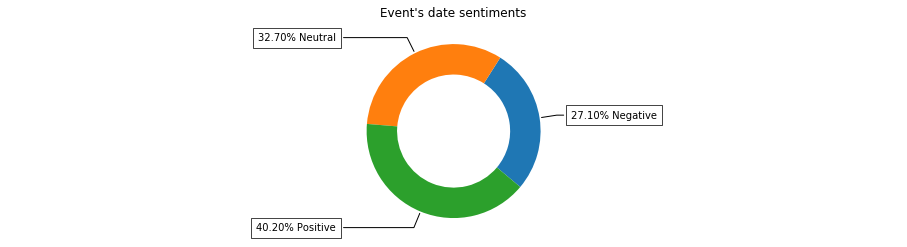

In [151]:
tweets_b_vd = vader_sentiment(tweets_b,35) 
print('b) March 29 2017')
show_graph(tweets_b_vd)

c) March 14 2019


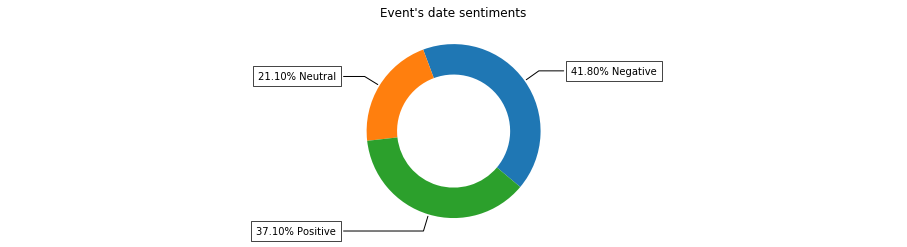

In [152]:
tweets_c_vd = vader_sentiment(tweets_c,35) 
print('c) March 14 2019')
show_graph(tweets_c_vd)

d) April 10 2019


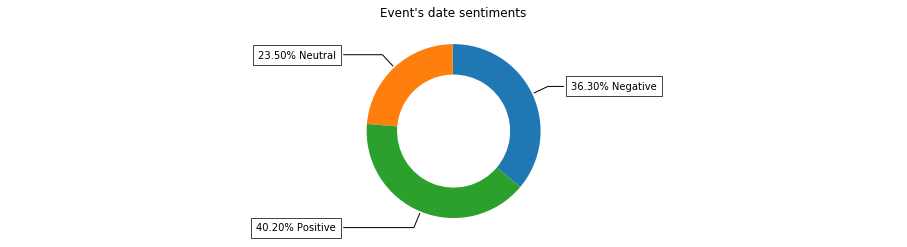

In [153]:
tweets_d_vd = vader_sentiment(tweets_d,35) 
print('d) April 10 2019')
show_graph(tweets_d_vd)

e) October 19 2019


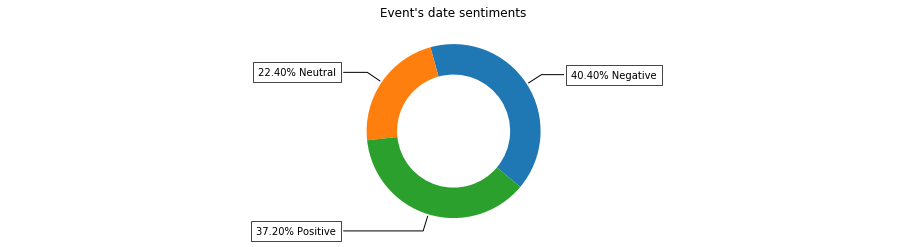

In [154]:
tweets_e_vd = vader_sentiment(tweets_e,35) 
print('e) October 19 2019')
show_graph(tweets_e_vd)

f) October 28 2019


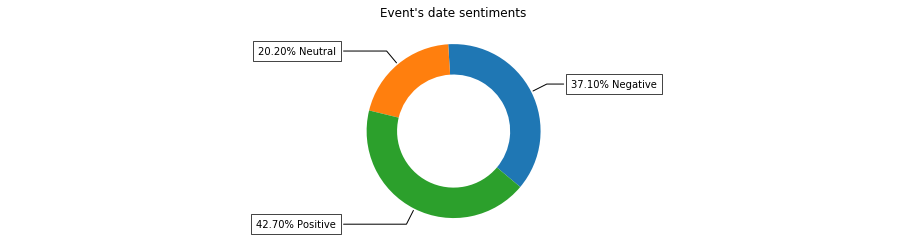

In [155]:
tweets_f_vd = vader_sentiment(tweets_f,35) 
print('f) October 28 2019')
show_graph(tweets_f_vd)

g) December 23 2019


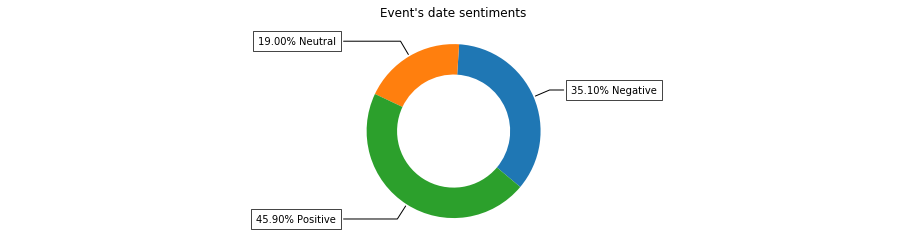

In [156]:
tweets_g_vd = vader_sentiment(tweets_g,35) 
print('g) December 23 2019')
show_graph(tweets_g_vd)

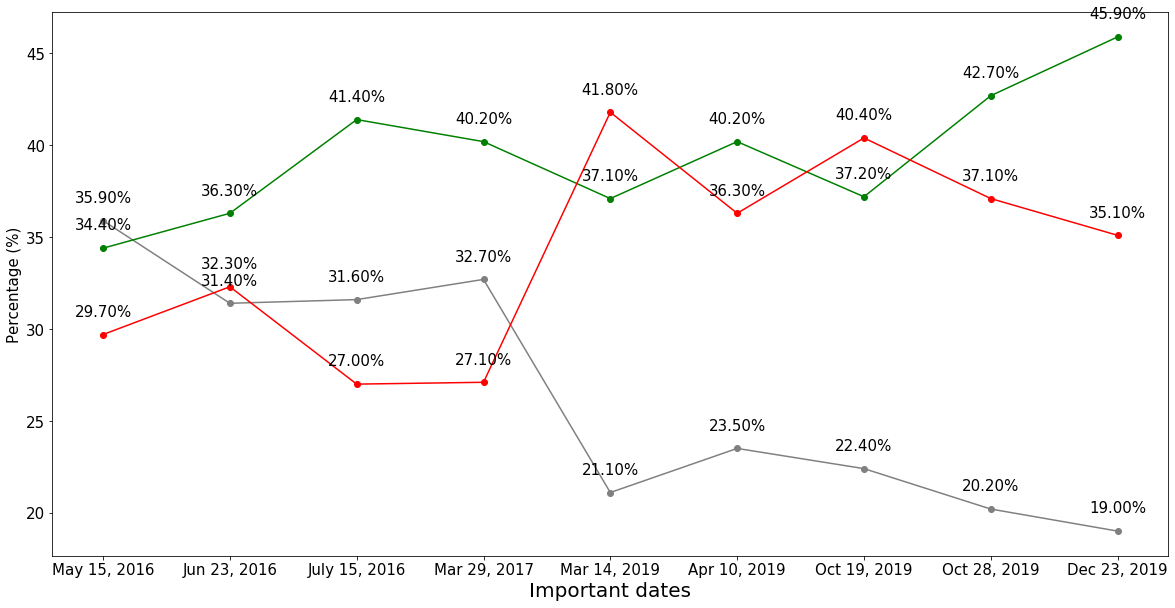

In [168]:
year = ['May 15, 2016','Jun 23, 2016', 'July 15, 2016','Mar 29, 2017', 'Mar 14, 2019', 'Apr 10, 2019', 'Oct 19, 2019', 'Oct 28, 2019','Dec 23, 2019']
Neutral = [35.90,31.40,31.60,32.70,21.10,23.50,22.40,20.20,19.00]
Positive = [34.40,36.30,41.4,40.20,37.10,40.20,37.20,42.70,45.90]
Negative = [29.70,32.30,27.00,27.10,41.80,36.30,40.40,37.10,35.1]

fig, ax = plt.subplots(figsize=(20, 10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

for i, v in enumerate(Neutral):
    ax.text(i, v+1, "%3.2f" %v + "%", ha="center")
for i, v in enumerate(Positive):
    ax.text(i, v+1, "%3.2f" %v + "%", ha="center")
for i, v in enumerate(Negative):
    ax.text(i, v+1, "%3.2f" %v + "%", ha="center")

plt.plot(year, Neutral, marker='o',color='gray')
plt.plot(year, Positive, marker='o', color='green')
plt.plot(year, Negative, marker='o', color='red')
plt.xlabel('Important dates',size=20)
plt.ylabel('Percentage (%)')
plt.show()

### (B) Named Entity Detection & Affect Calculator

- We will use corpus a2
- Carry out affect calculator on all tweets, using notable Leave/Remain hashtags, and people and organisations/ proper pronouns

#### Named Entity Detection

- Want to identify people & organizations mentioned across all tweets 

In [169]:
import nltk
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

def get_labeled_text(text,label_type='ALL'):
    en={}
    try:
        sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
        sentences = sent_detector.tokenize(text.strip())
        for sentence in sentences:
                tokenized = nltk.word_tokenize(sentence)
                tagged = nltk.pos_tag(tokenized)
                chunked = nltk.ne_chunk(tagged)
                for tree in chunked:
                    if hasattr(tree, 'label'):
                        if not label_type == "ALL":
                            if not tree.label() == label_type:
                                continue
                        ne = ' '.join(c[0] for c in tree.leaves())
                        en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
    except Exception as e:
        return str(e)
    return en

In [194]:
# All Tweets
tweets_a2 = []
for tweet in df_a2['Text'][:10000].to_list():
    if(type(tweet) == str):
        tweets_a2.append(tweet)
tweets_a2_str = ' '.join(tweets_a2)
get_labeled_text(tweets_a2_str)

{'Brexit': ['PERSON', 'NNP'],
 'TravelIndustryNews': ['ORGANIZATION', 'NNP'],
 'Donald Trump': ['PERSON', 'NNP NNP'],
 'UK': ['ORGANIZATION', 'NNP'],
 'Financial News No': ['ORGANIZATION', 'NNP NNP NNP'],
 'DTN': ['ORGANIZATION', 'NNP'],
 'Gav': ['PERSON', 'NNP'],
 'Osborne': ['PERSON', 'NNP'],
 'Telegraph': ['GPE', 'NN'],
 'Brexit Would Trigger': ['PERSON', 'NNP NNP NNP'],
 'Shock': ['PERSON', 'NNP'],
 'Ireland': ['GPE', 'NNP'],
 'Britain': ['GPE', 'NNP'],
 'Trump': ['PERSON', 'NNP'],
 'PLEASE': ['ORGANIZATION', 'NNP'],
 'NOT': ['ORGANIZATION', 'NNP'],
 'BREXIT Reality': ['ORGANIZATION', 'NNP NNP'],
 'EU': ['GPE', 'NNP'],
 'Europe': ['GPE', 'NNP'],
 'LoveEuropeLeaveEU': ['ORGANIZATION', 'NNP'],
 'EUReferendum': ['ORGANIZATION', 'NNP'],
 'LeaveEU': ['ORGANIZATION', 'NNP'],
 'VoteLeave': ['ORGANIZATION', 'NNP'],
 'StrongerIn Labour': ['ORGANIZATION', 'NNP NNP'],
 'LED': ['ORGANIZATION', 'NNP'],
 'Liberty': ['ORGANIZATION', 'NNP'],
 'Freedom': ['PERSON', 'NNP'],
 'VoteLeave Brexit': ['OR

In [195]:
get_labeled_text(tweets_a2_str,label_type='PERSON')

{'Brexit': ['PERSON', 'NNP'],
 'Donald Trump': ['PERSON', 'NNP NNP'],
 'Gav': ['PERSON', 'NNP'],
 'Osborne': ['PERSON', 'NNP'],
 'Brexit Would Trigger': ['PERSON', 'NNP NNP NNP'],
 'Shock': ['PERSON', 'NNP'],
 'Trump': ['PERSON', 'NNP'],
 'Freedom': ['PERSON', 'NNP'],
 'Indians': ['PERSON', 'NNP'],
 'Jeremy Corbyn': ['PERSON', 'NNP NNP'],
 'Trump Stumbles': ['PERSON', 'NNP NNP'],
 'Boris': ['PERSON', 'NNP'],
 'Would Require': ['PERSON', 'NNP NNP'],
 'Brexit Egyptair': ['PERSON', 'NNP NNP'],
 'Block Election': ['PERSON', 'NNP NNP'],
 'Albanians IN': ['PERSON', 'NNPS NNP'],
 'Simply': ['PERSON', 'NNP'],
 'Brexit Vote Leave': ['PERSON', 'NNP NNP NNP'],
 'Say': ['PERSON', 'NNP'],
 'Subjects Donald Trump': ['PERSON', 'NNP NNP NNP'],
 'Peter Thiel': ['PERSON', 'NNP NNP'],
 'Gove': ['PERSON', 'NNP'],
 'Strongerin': ['PERSON', 'NNP'],
 'Alison': ['PERSON', 'NNP'],
 'Diggelen': ['PERSON', 'NNP'],
 'Daily Mail': ['PERSON', 'JJ NNP'],
 'Brexit Brexit': ['PERSON', 'NNP NNP'],
 'Brexit IMO': ['PERS

In [196]:
get_labeled_text(tweets_a2_str,label_type='ORGANIZATION')

{'TravelIndustryNews': ['ORGANIZATION', 'NNP'],
 'UK': ['ORGANIZATION', 'NNP'],
 'Financial News No': ['ORGANIZATION', 'NNP NNP NNP'],
 'DTN': ['ORGANIZATION', 'NNP'],
 'PLEASE': ['ORGANIZATION', 'NNP'],
 'NOT': ['ORGANIZATION', 'NNP'],
 'BREXIT Reality': ['ORGANIZATION', 'NNP NNP'],
 'LoveEuropeLeaveEU': ['ORGANIZATION', 'NNP'],
 'EUReferendum': ['ORGANIZATION', 'NNP'],
 'LeaveEU': ['ORGANIZATION', 'NNP'],
 'VoteLeave': ['ORGANIZATION', 'NNP'],
 'StrongerIn Labour': ['ORGANIZATION', 'NNP NNP'],
 'LED': ['ORGANIZATION', 'NNP'],
 'Liberty': ['ORGANIZATION', 'NNP'],
 'VoteLeave Brexit': ['ORGANIZATION', 'NNP NNP'],
 'BREXIT': ['ORGANIZATION', 'NNP'],
 'HongKong': ['ORGANIZATION', 'NNP'],
 'Movie': ['ORGANIZATION', 'NNP'],
 'NO': ['ORGANIZATION', 'NNP'],
 'BRITISH': ['ORGANIZATION', 'NNP'],
 'THR': ['ORGANIZATION', 'NNP'],
 'BorisJohnson': ['ORGANIZATION', 'NNP'],
 'StrongerIn Mark Carney': ['ORGANIZATION', 'NNP NNP NNP'],
 'EUreferendum Take': ['ORGANIZATION', 'NNP NNP'],
 'PM Mariano Ra

#### Affect Calculator
- Get a sense of how positive or negative a tweet tends to be when it contains a certain tagged word.
- The larger the number, the more positive the tweet.

In [197]:
def get_affect(text,word,lower=True):
    import nltk
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(text.strip())
    sentence_count = 0
    running_total = 0
    for sentence in sentences:
        if lower: 
            sentence = sentence.lower()
            word = word.lower()
        if word in sentence:
            vs = analyzer.polarity_scores(sentence) 
            running_total += vs['compound']
            sentence_count += 1
    if sentence_count == 0: return 0
    return running_total/sentence_count

In [198]:
def get_affect_list(text,tags):
    affect_scores = list()
    for t in tags:
        affect_scores.append(get_affect(text, t, True))
    return [i for i in zip(tags,affect_scores)]

In [201]:
tags = ['voteleave','leave','voteremain', 'remain', 'brexit', 'cameron','carney',
        'farage','ukip','labour','theresa', 'corbyn','boris','tories','gove',
        'osborne','ireland','trump']
text = ' '.join(df_a2['Text'][:10000].to_list())

In [202]:
affect_scores = get_affect_list(text, tags)

In [205]:
pd.DataFrame(affect_scores, columns = ['tag','affect score'])

,tag,affect score
0,voteleave,0.084820
1,leave,-0.001214
2,voteremain,0.099161
3,remain,0.074195
4,brexit,0.024791
5,cameron,-0.077946
6,carney,0.046225
7,farage,0.034675
8,ukip,0.019832
9,labour,0.152621


Looks like there were very negative sentiments towards 'leave', David Cameron, Theresa May and Michael Gove in the month of the referendum!

## Part 4 - Topic Modelling with LDA

### (1) LDA: Find Topics
#### Pre-processing

In [206]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [214]:
tweet_list = df_a2['Text'].to_list()
texts = [[word for word in tweet.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for tweet in tweet_list if type(tweet) is not float]

In [215]:
dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence

#### Do the LDA

In [216]:
#Set parameters
num_topics = 10 #The number of topics that should be generated
passes = 20

In [217]:
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

#### Results

In [218]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=8))

[   (   0,
        '0.203*"vote" + 0.089*"remain" + 0.057*"leave" + 0.035*"referendum" + '
        '0.026*"cameron" + 0.024*"think" + 0.023*"people" + 0.019*"campaign"'),
    (   1,
        '0.040*"british" + 0.032*"right" + 0.029*"decision" + 0.029*"said" + '
        '0.016*"people" + 0.016*"young" + 0.014*"ukip" + 0.014*"stay"'),
    (   2,
        '0.045*"brexit" + 0.021*"global" + 0.019*"support" + 0.016*"like" + '
        '0.016*"great" + 0.014*"fears" + 0.014*"article" + 0.013*"happens"'),
    (   3,
        '0.073*"voted" + 0.038*"labour" + 0.036*"like" + 0.035*"voters" + '
        '0.026*"got" + 0.025*"ukip" + 0.021*"party" + 0.020*"new"'),
    (   4,
        '0.048*"ukip" + 0.030*"farage" + 0.022*"voting" + 0.022*"boris" + '
        '0.020*"going" + 0.019*"cash" + 0.018*"brexit" + 0.018*"nigel"'),
    (   5,
        '0.044*"england" + 0.025*"u" + 0.019*"world" + 0.018*"brexit" + '
        '0.018*"mps" + 0.014*"leaders" + 0.014*"change" + 0.013*"work"'),
    (   6,
        '0.0

In [231]:
from operator import itemgetter
topics = list()
for i in range(len(corpus)):
    topic = sorted(lda.get_document_topics(corpus[i],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)[0][0]
    topics.append(topic)

In [233]:
df_a2 = df_a2[df_a2['Text'].apply(lambda x: type(x)) != float]

In [234]:
df_a2['lda_topic']=np.array(topics)

In [236]:
df_a2.head()

,Username,Date,Favorites,Retweets,Hashtags,Text,Location,leave,remain,camp,lda_topic
0,bitcoinagile,2016-06-01 23:59:58+00:00,0,0,['#fintech'],No disruption here please: #fintech industry f...,NaN,0,0,neutral,2
1,madeiraholiday,2016-06-01 23:59:57+00:00,0,0,['#TravelIndustryNews'],#TravelIndustryNews - Brexit could cost the UK...,NaN,0,0,neutral,9
2,biz254,2016-06-01 23:59:53+00:00,0,0,[],"""Donald Trump seems completely unfamiliar with...",NaN,0,0,neutral,8
3,GIRSllc,2016-06-01 23:59:47+00:00,0,0,[],Donald Trump seems completely unfamiliar with ...,NaN,0,0,neutral,4
4,bitcoinagile,2016-06-01 23:59:42+00:00,0,0,['#fintech'],No disruption here please: #fintech industry f...,NaN,0,0,neutral,2


### (2) Text Summarization by identified topics

In [237]:
import gensim.summarization

Topic 1

In [253]:
print('number of tweets: ', len(df_a2[df_a2['lda_topic']==0]))
print('top words:')
pp.pprint(lda.print_topics(num_words=8)[0][1])
print()
topix0 = ' '.join(df_a2[df_a2['lda_topic']==0]['Text'][:1000].to_list())
summary = gensim.summarization.summarize(topix0, word_count=100) 
print(summary)

number of tweets:  26518
top words:
('0.203*"vote" + 0.089*"remain" + 0.057*"leave" + 0.035*"referendum" + '
 '0.026*"cameron" + 0.024*"think" + 0.023*"people" + 0.019*"campaign"')

Like that reporter who let Trump off the hook for not knowing what Brexit was #Brexit vote surging ahead - every vote counts in this referendum folks  George Osborne and Alistair Darling unite against Vote Leave http://gu.com/p/4k4ck/stw #Remain #VoteRemain #Strongerin #Brexit #EUref 'Grafters' Back Brexit, Says Michael Gove - Claims by the Leave camp that household fuel bills could be slashed...
https://twitter.com/Leavethe_EU/status/738061633180860416 Dodgy dave one rule for them and a million rules for uk time to leave eu http://www.express.co.uk/news/world/675779/EU-French-budget-Jean-Claude-Juncker #BRexit #Leave.EU The more I hear David Cameron speak & listen/read to his scaremongering if we leave EU, the more I think I will vote out.
George Osborne and Alistair Darling unite against Vote Leave http:/

Topic 2

In [254]:
print('number of tweets: ', len(df_a2[df_a2['lda_topic']==1]))
print('top words:')
pp.pprint(lda.print_topics(num_words=8)[1][1])
print()
topix1 = ' '.join(df_a2[df_a2['lda_topic']==1]['Text'][:1000].to_list())
summary = gensim.summarization.summarize(topix1, word_count=100) 
print(summary)

number of tweets:  12727
top words:
('0.040*"british" + 0.032*"right" + 0.029*"decision" + 0.029*"said" + '
 '0.016*"people" + 0.016*"young" + 0.014*"ukip" + 0.014*"stay"')

@BritsLovePolls #VoteLeave #VoteRemain I think i'd rather listen to Stephen Hawking on the EU than George Galloway #EUreferendum #StrongerIn #VoteRemain @Another_Europe @SalmaYaqoob on the power of collective action #VoteRemain  Post-#Brexit, #PritiPatel is planning a bonfire of your employment rights: https://www.tuc.org.uk/international-issues/europe/eu-referendum/workplace-issues/priti-patel-reveals-leave-campaign-agenda?render=overlay #VoteRemain Does this upcoming referendum just seem like a rather expensive #Tory leadership election?
.@joabbess exactly, I think the #voteremain campaign needs to make a better emotional case to stay in, fight the negative with positives 10 questions from young voters to #VoteRemain &amp; #VoteLeave that need answers before the #EUreferendum Apologies for the last two tweets, bu

Topic 3

In [255]:
print('number of tweets: ', len(df_a2[df_a2['lda_topic']==2]))
print('top words:')
pp.pprint(lda.print_topics(num_words=8)[2][1])
print()
topix2 = ' '.join(df_a2[df_a2['lda_topic']==2]['Text'][:1000].to_list())
summary = gensim.summarization.summarize(topix2, word_count=100) 
print(summary)

number of tweets:  13710
top words:
('0.045*"brexit" + 0.021*"global" + 0.019*"support" + 0.016*"like" + '
 '0.016*"great" + 0.014*"fears" + 0.014*"article" + 0.013*"happens"')

@Telegraph Interesting that your readers are committed to @LeaveEUOfficial @BorisJohnson Money Saving Expert's poll showing 63% #VoteLeave in the #EUreferendum 🇬🇧 #Brexit @vote_leave @LeaveEUOfficial  great work, thank you from me and millions of other people around the country!!
It's great to see so many people voting to remain a member of the EU on their postal ballot papers #StrongerIn #VoteRemain #EUreferendum Interesting thoughts on points based system that is being advocated by #Brexit campaign http://gu.com/p/4k2yn?CMP=Share_iOSApp_Other #remain #EUreferendum Thanks @kevpeel for organising a smashing 'Pizza and Politics' night @TTTMCR with @ChukaUmunna talking #EUreferendum #remain @UKLabourIN Love @TheTLS cover #Brexit #EUreferendum #tomorrowspaperstoday @BorisJohnson @David_Cameron quick ask!


Topic 4

In [257]:
print('number of tweets: ', len(df_a2[df_a2['lda_topic']==3]))
print('top words:')
pp.pprint(lda.print_topics(num_words=8)[3][1])
print()
topix3 = ' '.join(df_a2[df_a2['lda_topic']==3]['Text'][:1000].to_list())
summary = gensim.summarization.summarize(topix3, word_count=100) 
print(summary)

number of tweets:  16163
top words:
('0.073*"voted" + 0.038*"labour" + 0.036*"like" + 0.035*"voters" + 0.026*"got" '
 '+ 0.025*"ukip" + 0.021*"party" + 0.020*"new"')

Important (if totally depressing/infuriating) piece of #Loughboroughresearch #EUref #EUreferendum The European Union were going to call their European army the Wehrmacht, In homage to the 3rd reich lol #VoteLeave #EUreferendum #FuckTheEU IF YOU vote to #remain you are supporting cheap labour &amp; that means less wages in your pocket #EUReferendum  Wooden spoons and Labour leafleters #LabourIn #EUReferendum #StrongerIn http://www.souththanetlabour.org.uk/wooden_spoons_and_labour_leafleters via @ThanetLab I'm starting to see signs that Brexit 'fear factor' lies used by Cameron & Osborne might not have conned everyone after all #EUreferendum My thoughts on the link posted below.
Wise people hoping we will #VoteRemain https://twitter.com/jonathancoe/status/738115472349143044 convincing core Labour voters that leave is a Tory

Topic 5

In [258]:
print('number of tweets: ', len(df_a2[df_a2['lda_topic']==4]))
print('top words:')
pp.pprint(lda.print_topics(num_words=8)[4][1])
print()
topix4 = ' '.join(df_a2[df_a2['lda_topic']==4]['Text'][:1000].to_list())
summary = gensim.summarization.summarize(topix4, word_count=100) 
print(summary)

number of tweets:  16681
top words:
('0.048*"ukip" + 0.030*"farage" + 0.022*"voting" + 0.022*"boris" + '
 '0.020*"going" + 0.019*"cash" + 0.018*"brexit" + 0.018*"nigel"')

⚡️ “Donald Trump on U.K.'s Brexit: 'Huh?'” https://twitter.com/i/moments/738052524528263168 Tories Try To Block Election Probe http://news.sky.com/video/1705022/tories-try-to-block-election-probe Subjects Donald Trump is vague on in THR's cover story: Peter Thiel, Brexit http://thr.cm/NpWSUW surely Gove prepared to sacrifice prosperity of UK in gamble #Brexit will make @BorisJohnson PM and he'll be chancellor #StrongerIn MarketWatch: Donald Trump seems completely unfamiliar with the term “Brexit”: http://on.mktw.net/1UeuMy1 Donald Trump seems completely unfamiliar with the term “Brexit”:  NIGEL FARAGE: ‘We are GOING TO WIN’ Ukip leader fires THIS warning to the ‘Remain’ camp http://shr.gs/8eGiQag #EUreferendum: 70% of unionists voting for #Brexit #Belfast #LeaveEU #VoteLeave #INorOUT #StrongerIn @Nireland4GO It's our

Topic 6

In [259]:
print('number of tweets: ', len(df_a2[df_a2['lda_topic']==5]))
print('top words:')
pp.pprint(lda.print_topics(num_words=8)[5][1])
print()
topix5 = ' '.join(df_a2[df_a2['lda_topic']==5]['Text'][:1000].to_list())
summary = gensim.summarization.summarize(topix5, word_count=100) 
print(summary)

number of tweets:  11492
top words:
('0.044*"england" + 0.025*"u" + 0.019*"world" + 0.018*"brexit" + 0.018*"mps" + '
 '0.014*"leaders" + 0.014*"change" + 0.013*"work"')

@Nigel_Farage @UKIP  I despise the man however that's not my reasons for voting out #BREXIT #LEAVE #NOTOEU #NOTODICTATORSHIP #EU membership increases the costs of consumer goods http://www.dailysquib.co.uk/world/18125-false-claims-in-9-million-taxpayer-funded-gov-leaflet-uncovered.html #brexit #voteleave #euref #remain #go #britainout #leaveeu Same old same old #remain #ProjectFear project if u debate immigration i am going to brand u a racist #leave #eu https://twitter.com/timothy_stanley/status/735920119919083520 Leave EU, which is going to collapse anyway.
U know u wanna #VoteLeave #Brexit #LeaveEU https://twitter.com/WelshWarrior895/status/738122268887371776 BBC News - Germany warns of refugees 'groomed' by Islamists http://www.bbc.co.uk/news/world-europe-36429889 #voteremain #in #votein #takecontrol #EUref #EUdeba

Topic 7

In [261]:
print('number of tweets: ', len(df_a2[df_a2['lda_topic']==6]))
print('top words:')
pp.pprint(lda.print_topics(num_words=8)[6][1])
print()
topix6 = ' '.join(df_a2[df_a2['lda_topic']==6]['Text'][:1000].to_list())
summary = gensim.summarization.summarize(topix6, word_count=100) 
print(summary)

number of tweets:  11609
top words:
('0.027*"corbyn" + 0.027*"scotland" + 0.025*"view" + 0.023*"town" + '
 '0.021*"2nd" + 0.018*"news" + 0.015*"mp" + 0.015*"left"')

And transport them to remote island don't feed them & what caused this 😇 @Y_Eurosceptics @LeaveEUOfficial @OpenEurope @EUWatchers @EurActiv @euobs @Bruegel_org @UKIP https://twitter.com/End_of_Europe/status/738140184655454208 For those living in and close to Mill Hill, NW7 http://www.perock.co.uk/thinker/brexit-1.shtml @Grassroots_Out @LeaveEUOfficial @vote_leave @labour @Conservatives and we will do all the time as long as we're in is it right that we have 2 bail out the eurozone country's ???
Lots of people saying they'll #VoteRemain Good reception for the Labour Remain campaign on St Saviours estate Grange ward this evening #LabourInForBritain  #StrongerIn #LabourIN #LabourInForBritain #EUreferendum #Brexit #TakeControl EU Political aims triumph over Science Jeremy Corbyn Comes to Cornwall #LabourInForBritain #JEREMYCOR

Topic 8

In [262]:
print('number of tweets: ', len(df_a2[df_a2['lda_topic']==7]))
print('top words:')
pp.pprint(lda.print_topics(num_words=8)[7][1])
print()
topix7 = ' '.join(df_a2[df_a2['lda_topic']==7]['Text'][:1000].to_list())
summary = gensim.summarization.summarize(topix7, word_count=100) 
print(summary)

number of tweets:  34959
top words:
('0.209*"leave" + 0.197*"eu" + 0.081*"uk" + 0.078*"vote" + 0.037*"votes" + '
 '0.023*"britain" + 0.018*"says" + 0.013*"brexit"')

RSPB and WWF urge backers to vote stay in EU to protect UK wildlife http://gu.com/p/4k4vg/stw #VoteRemain #Remain #Strongerin #Brexit #EUref with an economy in as much trouble as Spains deporting 400k contributers to it wouldn't be a smart move would it Mr Rajoy #Brexit Out of EU we can make better policies 4 UK #Flexcit #Brexit #Remain #Strongerin #VoteLeave #EUref Stephen Hawking: Trump's popularity inexplicable and Brexit spells disaster http://fb.me/5C9ofGCAq If you want to buy a house vote to LEAVE the EU, Brexit camp tells young voters http://shr.gs/6ZQtr9j Are other EU nationalities allowed to vote in the brexit thingie, like in the EU elections?
#LeaveEU http://www.independent.co.uk/news/business/news/eu-referendum-why-the-economic-consensus-on-brexit-is-flawed-a7057306.html Why the economic consen… Leave EU 'for f

Topic 9

In [263]:
print('number of tweets: ', len(df_a2[df_a2['lda_topic']==8]))
print('top words:')
pp.pprint(lda.print_topics(num_words=8)[8][1])
print()
topix8 = ' '.join(df_a2[df_a2['lda_topic']==8]['Text'][:1000].to_list())
summary = gensim.summarization.summarize(topix8, word_count=100) 
print(summary)

number of tweets:  11791
top words:
('0.033*"country" + 0.023*"2" + 0.018*"4" + 0.018*"wanted" + 0.017*"post" + '
 '0.016*"parliament" + 0.016*"actually" + 0.014*"brexit"')

http://bit.ly/1Zem1rZ Lets get our sovereignty & democracy back #Flexcit #Brexit #Remain #Strongerin #VoteLeave #EUref Brexit runs risk of watch price rises and store closures: http://eye.am/ZJ9CtB Don't Mention Brexit as Carney in EU Purdah Honors Churchill http://bloom.bg/25BCGgd via @business 'EU Becomes Increasingly Orwellian in Preparation for Possible #Brexit' http://www.thedailybell.com/news-analysis/eu-becomes-increasingly-orwellian-in-preparation-for-possible-brexit/ #society #wakeup #geopolitics #x2t Reuters: Osborne, Darling slam Brexit proposals as unworkable, dangerous: Telegraph… http://goo.gl/fb/nyr1XC BREXIT Gold Diversification from One Of Oldest Private Banks In World  Mark Carney is dialing down the Brexit rhetoric http://www.bloomberg.com/news/articles/2016-06-01/don-t-mention-brexit-as-carney-i

Topic 10

In [264]:
print('number of tweets: ', len(df_a2[df_a2['lda_topic']==9]))
print('top words:')
pp.pprint(lda.print_topics(num_words=8)[9][1])
print()
topix9 = ' '.join(df_a2[df_a2['lda_topic']==8]['Text'][:1000].to_list())
summary = gensim.summarization.summarize(topix8, word_count=100) 
print(summary)

number of tweets:  15336
top words:
('0.049*"want" + 0.030*"need" + 0.021*"know" + 0.021*"way" + 0.020*"stop" + '
 '0.019*"democracy" + 0.016*"thought" + 0.013*"european"')

http://bit.ly/1Zem1rZ Lets get our sovereignty & democracy back #Flexcit #Brexit #Remain #Strongerin #VoteLeave #EUref Brexit runs risk of watch price rises and store closures: http://eye.am/ZJ9CtB Don't Mention Brexit as Carney in EU Purdah Honors Churchill http://bloom.bg/25BCGgd via @business 'EU Becomes Increasingly Orwellian in Preparation for Possible #Brexit' http://www.thedailybell.com/news-analysis/eu-becomes-increasingly-orwellian-in-preparation-for-possible-brexit/ #society #wakeup #geopolitics #x2t Reuters: Osborne, Darling slam Brexit proposals as unworkable, dangerous: Telegraph… http://goo.gl/fb/nyr1XC BREXIT Gold Diversification from One Of Oldest Private Banks In World  Mark Carney is dialing down the Brexit rhetoric http://www.bloomberg.com/news/articles/2016-06-01/don-t-mention-brexit-as-carney-i

## Part 5 - Machine Learning

### Data Preprocessing

In [12]:
train_df = df_a2
train_df = train_df[train_df.camp != 'neutral'].reset_index(drop=True)
train_df['camp'] = np.where(train_df['camp'] == 'leave', 1, 0)
print("size of training dataset (leave/remain): ", len(train_df),'\n')
train_df.info()

size of training dataset (leave/remain):  109225 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109225 entries, 0 to 109224
Data columns (total 10 columns):
Username     109225 non-null object
Date         109225 non-null object
Favorites    109225 non-null int64
Retweets     109225 non-null int64
Hashtags     109225 non-null object
Text         109225 non-null object
Location     0 non-null float64
leave        109225 non-null int64
remain       109225 non-null int64
camp         109225 non-null int32
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 7.9+ MB


In [13]:
test_df = df_famous
print("size of testing dataset: ", len(test_df),'\n')
test_df.info()

size of testing dataset:  2337 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2337 entries, 0 to 1654
Data columns (total 7 columns):
Username     2337 non-null object
Date         2337 non-null object
Favorites    2337 non-null float64
Retweets     2337 non-null float64
Hashtags     2337 non-null object
Text         2337 non-null object
camp         2337 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 146.1+ KB


### Creating binary bag-of-words

In [14]:
vocab_tweets = list()
for tweet in train_df['Text']:
    vocab_tweets.append(tweet)
for tweet in test_df['Text']: 
    vocab_tweets.append(tweet)

test_tweets = list() 
train_tweets = list() 
for tweet in train_df['Text']:
    train_tweets.append(tweet)
for tweet in test_df['Text']: 
    test_tweets.append(tweet)

In [15]:
vocab_tweets = remove_stop_stem_contract(vocab_tweets)

In [13]:
len(vocab_tweets)

111562

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=True, stop_words='english', binary=True)
vectorizer.fit(vocab_tweets)
tweet_vocab = vectorizer.vocabulary_
len(tweet_vocab)

52338

In [15]:
train_tweet_vectors = vectorizer.transform(train_tweets).toarray()
test_tweet_vectors = vectorizer.transform(test_tweets).toarray()

In [16]:
print(len(train_tweet_vectors), len(test_tweet_vectors))

109225 2337


In [24]:
x_train = train_tweet_vectors[:50000]
y_train = train_df['camp'][:50000]

x_test = test_tweet_vectors
y_test = test_df['camp']

### Instantiate: a preliminary Random Forest Classifier
Note: limit training dataset to 10,000 to prevent MemoryError

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#model fitting 
model = RandomForestClassifier(n_estimators=5)
model.fit(x_train,y_train)

In [310]:
# Confusion Matrix

accuracy = model.score(x_test, y_test) #% correctly classified 
print('accuracy:', accuracy)
from sklearn.metrics import confusion_matrix 
y_pred = model.predict(x_test) 
cfm = confusion_matrix(np.ravel(y_test), y_pred) 
print(cfm)

accuracy: 0.6529738981600343
[[ 418  264]
 [ 547 1108]]


### Use GridSearch to find best parameters

In [312]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50), #the number of trees
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
model.fit(x_train[:1000], np.ravel(y_train[:1000]))
model.best_score_, model.best_params_

(0.9570019120917324,
 {'max_depth': 4,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 10})

In [25]:
b_model = RandomForestClassifier(n_estimators=10, max_depth=4, min_samples_leaf=4, min_samples_split=2)

b_model.fit(x_train,np.ravel(y_train))
from sklearn.metrics import confusion_matrix
y_pred = b_model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
print(cfm)
accuracy = b_model.score(x_test, y_test)
accuracy

[[   0  682]
 [   0 1655]]


0.7081728712023962

### Bootstrapping

In [28]:
#bootstrapping
from sklearn.ensemble import BaggingClassifier 
model = BaggingClassifier() 
model.fit(x_train[:5000], np.ravel(y_train[:5000])) 

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [29]:
model.score(x_test, y_test) 

0.7419768934531451

In [30]:
from sklearn.model_selection import GridSearchCV 
parameters={
    'n_estimators': (30, 50), 
    'max_samples': (30, 40, 50), 
    'max_features': (1, 2, 3)
}
model = GridSearchCV(BaggingClassifier(), parameters, cv=3, iid=False) 
model.fit(x_train[:1000], np.ravel(y_train[:1000])) 
model.best_score_, model.best_params_ 

(0.9570019120917324,
 {'max_features': 1, 'max_samples': 30, 'n_estimators': 30})

In [31]:
#fit model based on GridSearchCV parameters 
model=BaggingClassifier(max_features=1,max_samples=30,n_estimators=30)
model.fit(x_train[:5000],np.ravel(y_train[:5000]))
model.score(x_test,y_test)

0.7081728712023962

### Decision Tree Classifiers

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 1, criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)
print(confusion_matrix(p_train,np.array(y_train)))
print(confusion_matrix(p_test,np.array(y_test)))

[[    0     0]
 [17089 32911]]
[[   0    0]
 [ 682 1655]]


In [39]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample Leave vs Remain')
pl.legend(loc="lower right")
pl.show()

### Linear Model

In [36]:
from sklearn import linear_model 
model=linear_model.LinearRegression() 
#fit model using training set 
model.fit(x_train[:10000], y_train[:10000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# testing_predictions=model.predict(x_test) 
# print(testing_predictions)

In [38]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample Leave vs Remain')
pl.legend(loc="lower right")
# pl.show()

### Neural Networks

In [21]:
from keras.layers import Dense
from keras.models import Sequential
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def get_X_y(df,hot=True):
    X = list()
    y = list()
    for tweet in df['Text']:
        X.append(tweet)
    for camp in df['camp']:
        if camp == 'leave' or camp == 1:
            y.append(1)
        elif camp == 'remain' or camp == 0:
            y.append(0)
        
    X = remove_stop_stem_contract(X)
    X = vectorizer.transform(X).toarray()
    if hot==True:
        y = keras.utils.to_categorical(y, 2)
    
    return X, y 

In [22]:
X_train, y_train = get_X_y(train_df[:10000])
X_test, y_test = get_X_y(test_df)

In [23]:
def create_dense(layer_sizes, activation='sigmoid'):
    feature_size = len(tweet_vocab)
    num_class = 2
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation = activation, input_shape=(feature_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = activation))

    model.add(Dense(units=num_class, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5, ver=False):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(X_test, y_test, verbose=ver)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                3349696   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 3,349,826
Trainable params: 3,349,826
Non-trainable params: 0
_________________________________________________________________
2337/2337 [==============================] - 1s 564us/step


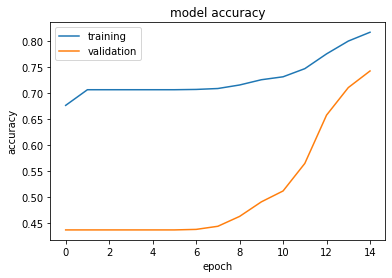


Test loss: 0.565
Test accuracy: 0.736
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                3349696   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 3,353,986
Trainable params: 3,353,986
Non-trainable params: 0
_________________________________________________________________
2337/2337 [==============================] - 1s 466us/step


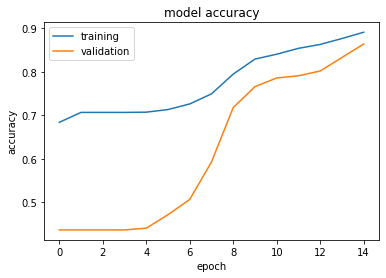


Test loss: 0.542
Test accuracy: 0.763
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                3349696   
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 130       
Total params: 3,358,146
Trainable params: 3,358,146
Non-trainable params: 0
_________________________________________________________________
2337/2337 [==============================] - 1s 444us/step


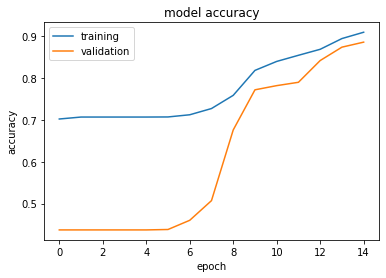


Test loss: 0.532
Test accuracy: 0.777
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                3349696   
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 130       
Total params: 3,362,306
Trainable params: 3,362,306
Non-trainable params: 0
_________________________________________________________________
2337/2337 [==============================] - 1s 459us/step


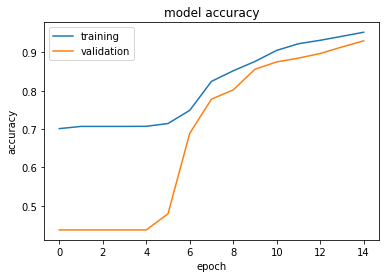


Test loss: 0.526
Test accuracy: 0.785
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                3349696   
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 130       
Total params: 3,366,466
Trainable params: 3,366,466
Non-trainable params: 0
_____

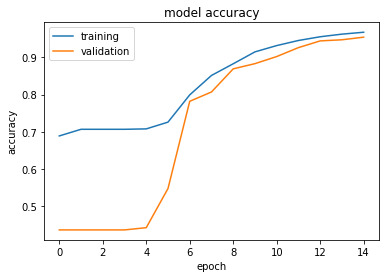


Test loss: 0.539
Test accuracy: 0.781
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                3349696   
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense

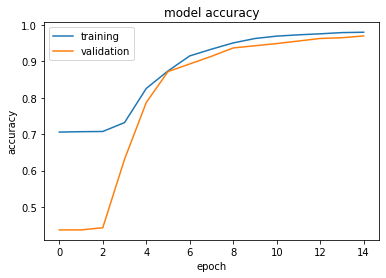


Test loss: 0.585
Test accuracy: 0.779
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                3349696   
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense

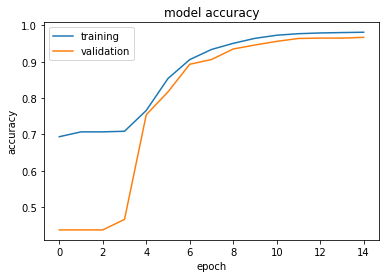


Test loss: 0.591
Test accuracy: 0.777
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                3349696   
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_42 (Dense

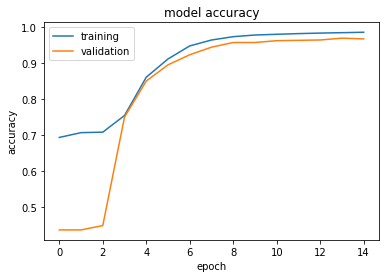


Test loss: 0.625
Test accuracy: 0.777
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                3349696   
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_50 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_51 (Dense

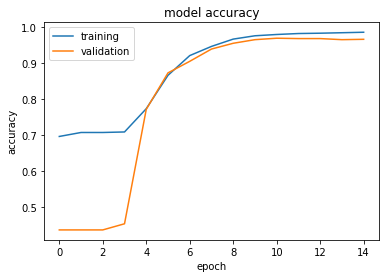


Test loss: 0.621
Test accuracy: 0.774


In [24]:
for layers in range(1,10):
    model = create_dense([64]*layers, activation='tanh')
    evaluate(model, batch_size = 500, epochs=15, ver=1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 32)                1674848   
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 66        
Total params: 1,674,914
Trainable params: 1,674,914
Non-trainable params: 0
_________________________________________________________________
2337/2337 [==============================] - 1s 414us/step


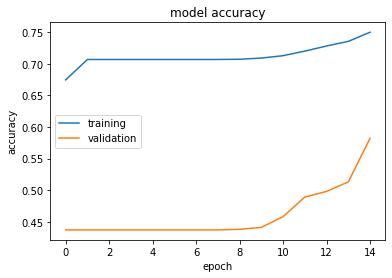


Test loss: 0.571
Test accuracy: 0.725
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 32)                1674848   
_________________________________________________________________
dense_58 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 66        
Total params: 1,675,970
Trainable params: 1,675,970
Non-trainable params: 0
_________________________________________________________________
2337/2337 [==============================] - 1s 394us/step


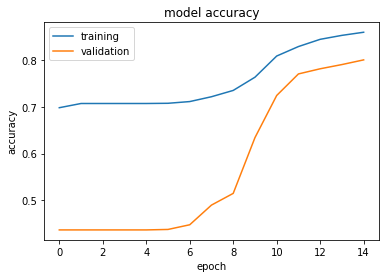


Test loss: 0.544
Test accuracy: 0.757
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                1674848   
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_62 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 66        
Total params: 1,677,026
Trainable params: 1,677,026
Non-trainable params: 0
_________________________________________________________________
2337/2337 [==============================] - 1s 406us/step


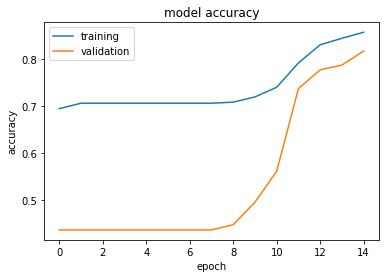


Test loss: 0.543
Test accuracy: 0.763
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                1674848   
_________________________________________________________________
dense_65 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_66 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 66        
Total params: 1,678,082
Trainable params: 1,678,082
Non-trainable params: 0
_________________________________________________________________
2337/2337 [==============================] - 1s 380us/step


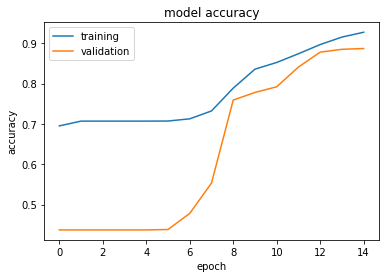


Test loss: 0.524
Test accuracy: 0.782
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 32)                1674848   
_________________________________________________________________
dense_70 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_71 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_72 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_73 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_74 (Dense)             (None, 2)                 66        
Total params: 1,679,138
Trainable params: 1,679,138
Non-trainable params: 0
____

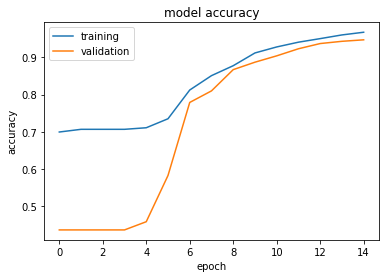


Test loss: 0.525
Test accuracy: 0.788
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 32)                1674848   
_________________________________________________________________
dense_76 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_77 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_78 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_79 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_80 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_81 (Dens

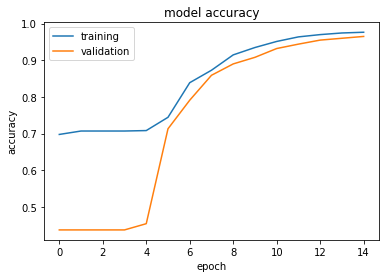


Test loss: 0.556
Test accuracy: 0.786
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 32)                1674848   
_________________________________________________________________
dense_83 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_84 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_85 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_86 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_87 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_88 (Dens

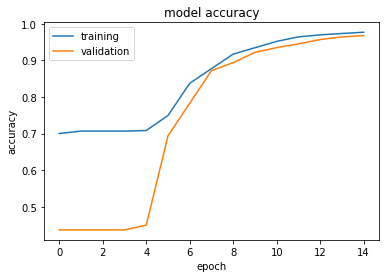


Test loss: 0.566
Test accuracy: 0.78
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 32)                1674848   
_________________________________________________________________
dense_91 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_92 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_93 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_94 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_95 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_96 (Dense

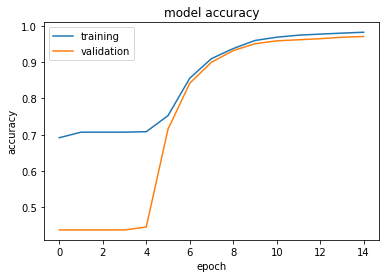


Test loss: 0.566
Test accuracy: 0.781
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 32)                1674848   
_________________________________________________________________
dense_100 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_101 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_102 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_103 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_104 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_105 (Den

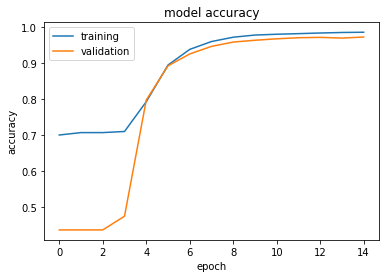


Test loss: 0.627
Test accuracy: 0.768


In [25]:
for layers in range(1,10):
    model = create_dense([32]*layers, activation='tanh')
    evaluate(model, batch_size = 500, epochs=15, ver=1)

In [ ]:
for layers in range(1,6):
    model = create_dense([32]*layers, activation='relu')
    evaluate(model, batch_size = 500, epochs=40, ver=1)

In [ ]:
for layers in range(1,5):
    model = create_dense([64]*layers)
    evaluate(model, batch_size = 500, epochs=15, ver=1)

### Support Vector Machines

In [27]:
X_train, y_train_svm = get_X_y(train_df,hot=False)
X_test,y_test_svm = get_X_y(test_df,hot=False)

In [28]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
X_train[:50000].shape

(50000, 52338)

In [30]:
X_test.shape

(2337, 52338)

In [34]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train[:5000], y_train_svm[:5000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
y_pred = svclassifier.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_svm, y_pred))
print(classification_report(y_test_svm,y_pred))

[[ 441  241]
 [ 491 1164]]
              precision    recall  f1-score   support

           0       0.47      0.65      0.55       682
           1       0.83      0.70      0.76      1655

    accuracy                           0.69      2337
   macro avg       0.65      0.67      0.65      2337
weighted avg       0.72      0.69      0.70      2337



# Part 6 - Further Visualizations with Referendum Data

In [ ]:
census = pd.read_csv("/Users/simrankalera/Desktop/Brexit files/census.csv")

In [ ]:
eu = pd.read_csv("/Users/simrankalera/Desktop/Brexit files/EU-referendum-result-data.csv")

In [ ]:
result = pd.merge(eu, census, how='left', left_on=['Area_Code'], right_on=['Code'])

#### Cleaning the data

In [ ]:
def clean_census_df(res):
    col_list = list(res)[42:]
    res[col_list] = res[col_list].astype(str)

    for i in col_list:
        res[i]=res[i].apply(lambda x: (x.replace(',','')))
        res[i]=res[i].replace('nan', 0)

    res['18-29']=res['18'].astype(int)+res['19'].astype(int)+res['20'].astype(int)+res['21'].astype(int)+res['22'].astype(int)+res['23'].astype(int)+res['24'].astype(int)+res['25'].astype(int)+res['26'].astype(int)+res['27'].astype(int)+res['28'].astype(int)+res['29'].astype(int)
    res['30-39']=res['30'].astype(int)+res['31'].astype(int)+res['32'].astype(int)+res['33'].astype(int)+res['34'].astype(int)+res['35'].astype(int)+res['36'].astype(int)+res['37'].astype(int)+res['38'].astype(int)+res['39'].astype(int)
    res['40-49']=res['40'].astype(int)+res['41'].astype(int)+res['42'].astype(int)+res['43'].astype(int)+res['44'].astype(int)+res['45'].astype(int)+res['46'].astype(int)+res['47'].astype(int)+res['48'].astype(int)+res['49'].astype(int)
    res['50-59']=res['50'].astype(int)+res['51'].astype(int)+res['52'].astype(int)+res['53'].astype(int)+res['54'].astype(int)+res['55'].astype(int)+res['56'].astype(int)+res['57'].astype(int)+res['58'].astype(int)+res['59'].astype(int)
    res['60-69']=res['60'].astype(int)+res['61'].astype(int)+res['62'].astype(int)+res['63'].astype(int)+res['64'].astype(int)+res['65'].astype(int)+res['66'].astype(int)+res['67'].astype(int)+res['68'].astype(int)+res['69'].astype(int)
    res['70-79']=res['70'].astype(int)+res['71'].astype(int)+res['72'].astype(int)+res['73'].astype(int)+res['74'].astype(int)+res['75'].astype(int)+res['76'].astype(int)+res['77'].astype(int)+res['78'].astype(int)+res['79'].astype(int)
    res['80-90']=res['80'].astype(int)+res['81'].astype(int)+res['82'].astype(int)+res['83'].astype(int)+res['84'].astype(int)+res['85'].astype(int)+res['86'].astype(int)+res['87'].astype(int)+res['88'].astype(int)+res['89'].astype(int)+res['90'].astype(int)
    
    return res

In [ ]:
result_ = clean_census_df(result)
cols_list = list(result_)
cols = cols_list[:24]
cols.extend(cols_list[-7:])
final_res = result_[cols]

#### Calculating the difference between Remain and Leave votes per area

In [ ]:
final_res["votes"] = final_res["Remain"] - final_res["Leave"]

#### Getting the lat long coordinates for every area using geopy


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
locations = []
area_list = final_res['Area'].unique()
latitude=[]
longitude=[]
for area in area_list:
    try:
        area_loc = geolocator.geocode(area)
        latitude.append(area_loc.latitude)
        longitude.append(area_loc.longitude)
        locations.append((area_loc.latitude, area_loc.longitude))
    except:
        latitude.append(None)
        longitude.append(None)
        locations.append((56.4907, 4.2026))

In [ ]:
final_res['Latitude'] = latitude
final_res['Longitude'] = longitude
final_res['Location'] = locations

### Plotting the favored votes : Leave(Red) or Remain(Green) on the UK map according to the locations of the votes

In [ ]:
import folium
m = folium.Map(location=[55,-3],zoom_start=5.5)
for i in range(len(final_res)):
    loc = final_res.iloc[i]['Location']
    try:
        if loc[0] >= 49.959999905 and loc[0] <= 58.6350001085 and loc[1] >= -7.57216793459 and loc[1] <= 1.68153079591:
            if final_res.iloc[i]['votes'] >0:
                folium.CircleMarker([loc[0],loc[1]],radius=10,color='green',fill=True,fill_color='green').add_to(m)
            elif final_res.iloc[i]['votes'] <0:
                 folium.CircleMarker([loc[0],loc[1]],radius=10,color='red',fill=True,fill_color='red').add_to(m)
            else:
                 folium.CircleMarker([loc[0],loc[1]],radius=10,color='gray',fill=True,fill_color='gray').add_to(m)
                
    except:
        pass
m

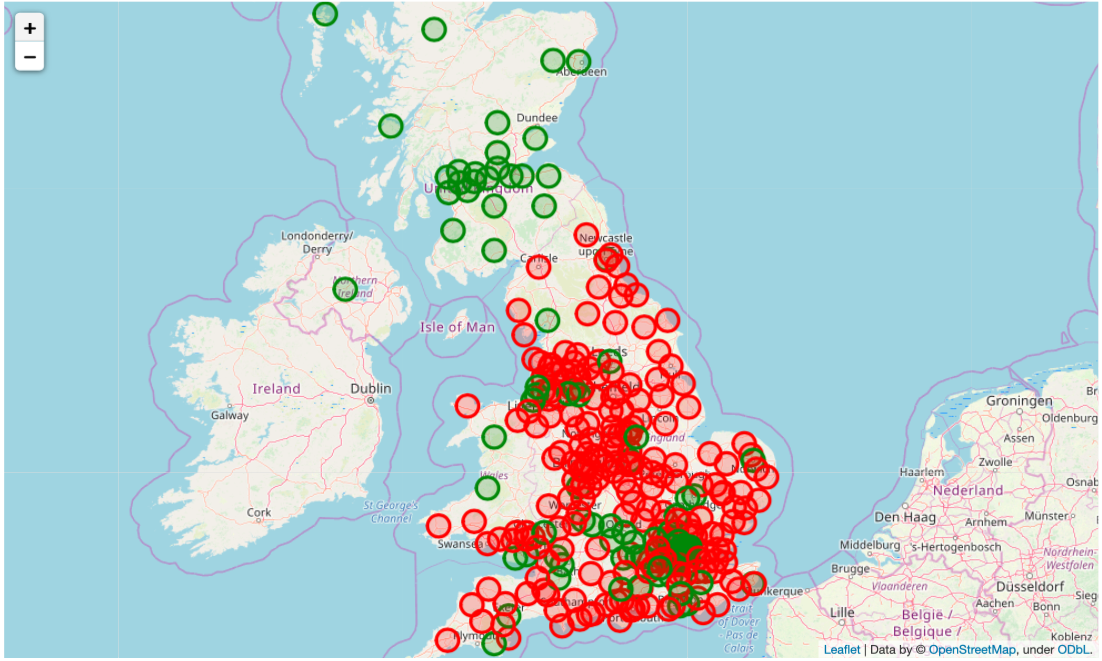

In [20]:
from IPython.display import Image
Image(filename="eurefmap.png")